## Content List

- IMDB Rating이랑 join해서 인기도 확인
- 결측치를 어떻게 채울 것인가?


- 연도별 인기 컨텐츠
- 나라별 인기 컨텐츠
- TV show -vs- Movie?
<br>
<br>
<br>

- 시청 등급별 컨텐츠
- 다작왕 배우(혹은 감독?)


In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
warnings.filterwarnings(action='ignore')

In [2]:
netflix_origin = pd.read_csv('./archive/netflix_titles.csv')
netflix_origin.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
netflix_origin

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [46]:
netflix_origin["date_added"] = pd.to_datetime(netflix_origin['date_added'])
netflix_origin['year_added'] = netflix_origin['date_added'].dt.year
netflix_origin['month_added'] = netflix_origin['date_added'].dt.month

## 연도별 컨텐츠 수

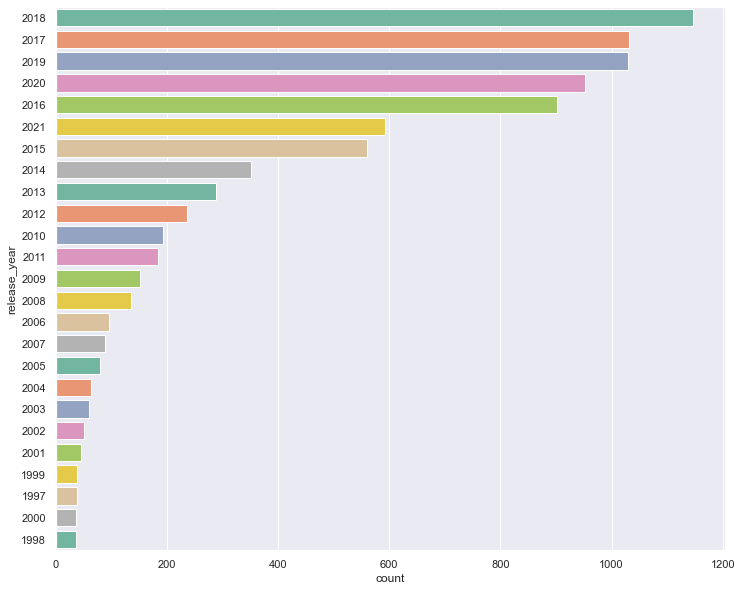

In [16]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(y="release_year", data=netflix_origin, palette="Set2", order=netflix_origin['release_year'].value_counts().index[0:25])

## Movie -vs- Tvshow

<AxesSubplot:ylabel='type'>

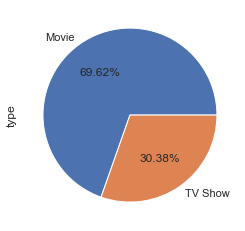

In [32]:
netflix_origin['type'].value_counts().plot(kind='pie', autopct = "%.2f%%")

type
Movie      AxesSubplot(0.125,0.125;0.352273x0.755)
TV Show    AxesSubplot(0.125,0.125;0.352273x0.755)
Name: release_year, dtype: object

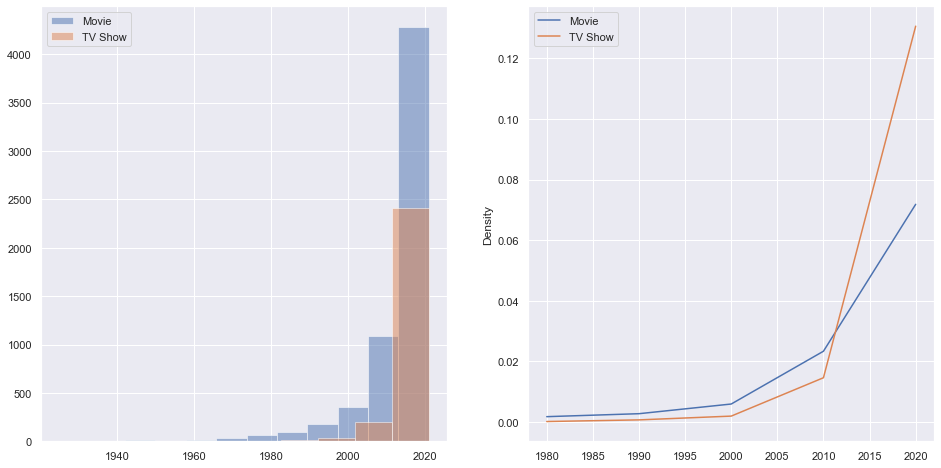

In [35]:
fig, axs = plt.subplots(ncols=2,figsize=(16, 8))
netflix_origin.groupby('type')['release_year'].plot(kind='kde', ax=axs[1], ind=[1980,1990,2000,2010,2020],legend=True)
netflix_origin.groupby('type')['release_year'].hist(alpha=0.5, ax=axs[0], legend=True)

In [47]:
d1 = netflix_origin[netflix_origin["type"] == "TV Show"]
d2 = netflix_origin[netflix_origin["type"] == "Movie"]

col = "date_added"

vc1 = d1[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = d2[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Scatter(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
data = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(data, layout=layout)
fig.show()

- 2010년을 기점으로 Tv Show 시리즈가 Movie보다 더 높은 비율로 많이 제작되는 것을 확인할 수 있다.
- 즉 기울기가 더 가파름

## Data Join

In [36]:
imdb_ratings = pd.read_csv('./archive/data.tsv', sep='\t')
imdb_basics = pd.read_csv('./archive/basics_data.tsv', sep='\t')
imdb_ratings

,tconst,averageRating,numVotes
0,tt0000001,5.7,1864
1,tt0000002,6.0,244
2,tt0000003,6.5,1632
3,tt0000004,5.8,158
4,tt0000005,6.2,2459
...,...,...,...
1221008,tt9916690,6.6,5
1221009,tt9916720,5.7,191
1221010,tt9916730,8.4,5
1221011,tt9916766,6.7,18


In [19]:
imdb_basics

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
...,...,...,...,...,...,...,...,...,...
8749007,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2010,\N,\N,"Action,Drama,Family"
8749008,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family"
8749009,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family"
8749010,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short


In [22]:
imdb_joint=imdb_ratings.merge(imdb_basics,left_on='tconst',right_on='tconst',how='inner')
imdb_joint=imdb_joint.sort_values(by='averageRating', ascending=False)

In [23]:
imdb_joint

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
583265,tt12799278,10.0,7,tvEpisode,Gerador de Energia,Gerador de Energia,0,2015,\N,\N,"Action,Adventure,Comedy"
983146,tt4757782,10.0,6,tvEpisode,Episode dated 2 May 2000,Episode dated 2 May 2000,0,2000,\N,\N,Drama
1114198,tt7123148,10.0,25,tvEpisode,Episode #1.43,Episode #1.43,0,2008,\N,\N,Talk-Show
1114197,tt7123146,10.0,25,tvEpisode,Episode #1.42,Episode #1.42,0,2008,\N,\N,Talk-Show
510380,tt11202418,10.0,7,video,The Pact,The Pact,0,2020,\N,\N,Drama
...,...,...,...,...,...,...,...,...,...,...,...
252380,tt0473109,1.0,12,movie,Eine weisse unter Kannibalen,Eine weisse unter Kannibalen,0,1921,\N,\N,Adventure
1197557,tt9154904,1.0,28,tvEpisode,Episode #1.14,Episode #1.14,0,2018,\N,\N,"Comedy,Romance"
648035,tt14300584,1.0,27,tvEpisode,Episode #1.36,Episode #1.36,0,2014,\N,\N,"Drama,Romance"
648039,tt14300600,1.0,27,tvEpisode,Episode #1.37,Episode #1.37,0,2014,\N,\N,"Drama,Romance"


In [24]:
joint_data=imdb_joint.merge(netflix_origin,left_on='originalTitle',right_on='title',how='inner')
joint_data=joint_data.sort_values(by='averageRating', ascending=False)

In [25]:
joint_data

,tconst,averageRating,numVotes,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,...,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,tt4779328,10.0,5,short,The Rehearsal,The Rehearsal,0,2019,\N,18,...,The Rehearsal,Alison MacLean,"James Rolleston, Kerry Fox, Ella Edwards, Alic...",New Zealand,"January 1, 2018",2016,TV-MA,102 min,"Dramas, Independent Movies, International Movies",A drama student is torn between creative possi...
26,tt1106949,10.0,8,tvEpisode,Paradise Lost,Paradise Lost,0,1999,\N,\N,...,Paradise Lost,Monique Gardenberg,"Júlio Andrade, Lee Taylor, Hermila Guedes, Jul...",Brazil,"September 29, 2018",2018,TV-MA,111 min,"Dramas, Independent Movies, International Movies",A cop moonlights as the bodyguard for a young ...
490,tt1989043,10.0,17,tvEpisode,The Main Event,The Main Event,0,2011,\N,\N,...,The Main Event,Jay Karas,"Seth Carr, Tichina Arnold, Adam Pally, Ken Mar...",United States,"April 10, 2020",2020,TV-G,103 min,"Children & Family Movies, Comedies, Sports Movies","Using special powers from a magical mask, a yo..."
496,tt0541975,10.0,7,tvEpisode,She's the One,She's the One,0,2000,\N,\N,...,She's the One,Mae Czarina Cruz,"Bea Alonzo, Dingdong Dantes, Enrique Gil",Philippines,"December 10, 2020",2013,TV-14,111 min,"Dramas, International Movies, Romantic Movies",When his best friend gets stranded in the rain...
285,tt18212948,10.0,7,short,Aftermath,Aftermath,0,2020,\N,23,...,Aftermath,Peter Winther,"Ashley Greene, Shawn Ashmore, Sharif Atkins, B...",United States,"August 4, 2021",2021,TV-MA,115 min,Horror Movies,"Desperate to save their marriage, a young coup..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,tt16257816,1.1,11,tvEpisode,Bad Blood,Bad Blood,0,2021,\N,\N,...,Bad Blood,NaN,"Anthony LaPaglia, Kim Coates, Enrico Colantoni...",Canada,"May 31, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas",This sprawling crime drama follows the true st...
3873,tt3882974,1.0,7,tvEpisode,The Trap,The Trap,0,1961,\N,7,...,The Trap,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...
11624,tt1540829,1.0,11,video,Conspiracy,Conspiracy,0,2006,\N,20,...,Conspiracy,NaN,Mark Bazeley,United Kingdom,"September 1, 2016",2015,TV-14,1 Season,"British TV Shows, Docuseries",Skeptics and others discuss widely held conspi...
6968,tt4175520,1.0,5,tvEpisode,Africa,Africa,0,2014,\N,\N,...,Africa,NaN,David Attenborough,United Kingdom,"April 28, 2016",2013,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This five-part nature series chronicles fascin...


In [26]:
joint_data.columns

Index(['tconst', 'averageRating', 'numVotes', 'titleType', 'primaryTitle',
       'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes',
       'genres', 'show_id', 'type', 'title', 'director', 'cast', 'country',
       'date_added', 'release_year', 'rating', 'duration', 'listed_in',
       'description'],
      dtype='object')

In [29]:
joint_data = joint_data.drop(['tconst','titleType', 'primaryTitle','originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes'], axis=1)

In [30]:
joint_data

,averageRating,numVotes,genres,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,10.0,5,"Drama,Short",s8481,Movie,The Rehearsal,Alison MacLean,"James Rolleston, Kerry Fox, Ella Edwards, Alic...",New Zealand,"January 1, 2018",2016,TV-MA,102 min,"Dramas, Independent Movies, International Movies",A drama student is torn between creative possi...
26,10.0,8,"Crime,Drama",s4618,Movie,Paradise Lost,Monique Gardenberg,"Júlio Andrade, Lee Taylor, Hermila Guedes, Jul...",Brazil,"September 29, 2018",2018,TV-MA,111 min,"Dramas, Independent Movies, International Movies",A cop moonlights as the bodyguard for a young ...
490,10.0,17,Comedy,s2696,Movie,The Main Event,Jay Karas,"Seth Carr, Tichina Arnold, Adam Pally, Ken Mar...",United States,"April 10, 2020",2020,TV-G,103 min,"Children & Family Movies, Comedies, Sports Movies","Using special powers from a magical mask, a yo..."
496,10.0,7,"Crime,Drama",s1567,Movie,She's the One,Mae Czarina Cruz,"Bea Alonzo, Dingdong Dantes, Enrique Gil",Philippines,"December 10, 2020",2013,TV-14,111 min,"Dramas, International Movies, Romantic Movies",When his best friend gets stranded in the rain...
285,10.0,7,"Short,Thriller",s308,Movie,Aftermath,Peter Winther,"Ashley Greene, Shawn Ashmore, Sharif Atkins, B...",United States,"August 4, 2021",2021,TV-MA,115 min,Horror Movies,"Desperate to save their marriage, a young coup..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5168,1.1,11,Drama,s3788,TV Show,Bad Blood,NaN,"Anthony LaPaglia, Kim Coates, Enrico Colantoni...",Canada,"May 31, 2019",2019,TV-MA,2 Seasons,"Crime TV Shows, TV Dramas",This sprawling crime drama follows the true st...
3873,1.0,7,"Action,Adventure,Animation",s3958,Movie,The Trap,Erik White,"T.I., Mike Epps, Loretta Devine, Queen Latifah...",United States,"April 1, 2019",2017,TV-MA,91 min,Comedies,A man returns home to Atlanta to try and turn ...
11624,1.0,11,"Horror,Short,Thriller",s5802,TV Show,Conspiracy,NaN,Mark Bazeley,United Kingdom,"September 1, 2016",2015,TV-14,1 Season,"British TV Shows, Docuseries",Skeptics and others discuss widely held conspi...
6968,1.0,5,Reality-TV,s6095,TV Show,Africa,NaN,David Attenborough,United Kingdom,"April 28, 2016",2013,TV-PG,1 Season,"British TV Shows, Docuseries, International TV...",This five-part nature series chronicles fascin...


## 연도별 인기 컨텐츠

In [ ]:
이거안함

## 나라별 인기 컨텐츠

Text(0.5, 0, 'Ratio')

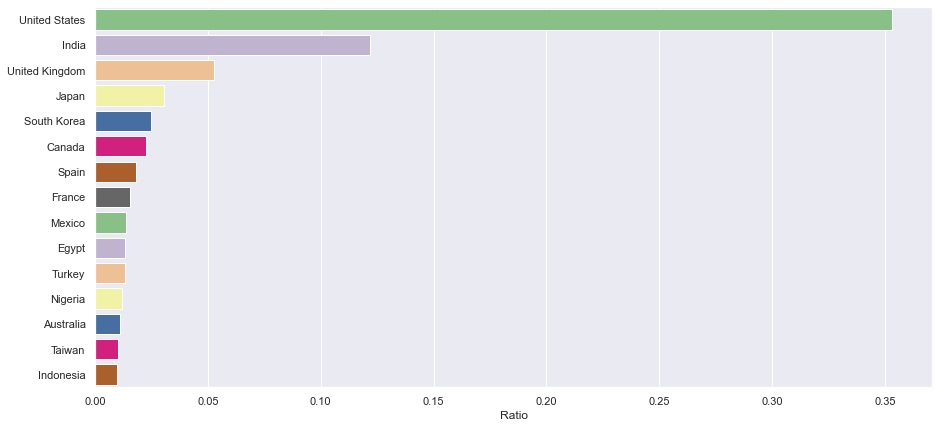

In [38]:
plt.figure(figsize = (15, 7))
country = netflix_origin['country'].value_counts(normalize=True)[:15]
sns.barplot(x = country, y = country.index, palette = "Accent")
plt.xlabel("Ratio")

In [ ]:
여기까지했어요